<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<b>Привет, Ролан!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду ревьюером твоего проекта. Предлагаю обращаться на "ты", но если это неудобно, пожалуйста, скажи об этом! 
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии расскрашены разными цветами: 
<br/>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> В случае корректного решения (или отдельных его моментов). На такие решения можно опираться в будущем.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Если есть возможность как-либо улучшить решение. Ты можешь учесть эти комментарии при доработке проекта, однако для зачета это не обязательно.
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Если решение требует внесения правок. Проект не может быть принят, если остались не отработанные комментарии данного типа.
</div>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀
    
Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

# Анализ лояльности пользователей Яндекс Афиши
- Автор: Мухаджинов Ролан
- Дата: 20.11.25

### Цели и задачи проекта
**Цель:** Провести исследовательский анализ данных, чтобы понять, какие пользователи с большей вероятностью возвращаются на платформу и делают заказы повторно

**Задачи:**
1. Загрузить данные.
2. Провести предобработку данных.
3. Создать профиль искомого пользователя
4. Провести исследовательский анализ данных
5. Сформулировать выводы по проведённому анализу.

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Вводная часть <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здорово, что оставляешь вводную часть! Она помогает быстро понять цель, контекст и структуру работы, что будет удобно не только для тебя при возвращении к проекту спустя время, но и любому другому читателю (если, например, публикуешь в открытый доступ для портфолио). Воспринимаем эту тетрадку не просто как выполнение домашней работы на курсе, а как полноценный исследовательский проект.
</div>
<div style="border-radius: 10px" class="alert alert-warning"> 
<b>Рекомендации💡:</b> Как правило, в вводную часть включают название проекта, краткое описание цели, используемых данных (источники, объем, особенности), нюансы самого проекта (специфические условия, ограничения, предположения и т.д.). Иногда также сразу обозначают план шагов. Другими словами, вводная часть призвана отразить, что мы делаем, с чем работаем и на каких условиях.
</div>

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка



In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%pip install -q dotenv
import dotenv

# импорт sqlalchemy
try:
    from sqlalchemy import create_engine
except ModuleNotFoundError as e:
    !pip install sqlalchemy
    from sqlalchemy import create_engine
    print("Error was:", e)

try:
    %pip install -q psycopg2
except ModuleNotFoundError as e:
    %pip install psycopg2-binary

# импорт phik
try:
    from phik import phik_matrix
except ModuleNotFoundError as e:
    !pip -q install phik
    from phik import phik_matrix
    print("Error was:", e)

display('succesfull')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


'succesfull'

In [2]:
# Отключим предупреждения о будущих изменениях библиотек
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Импорты <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здорово, что все необходимые библиотеки подгружаешь сразу в начале проекта! Это соответсвует стандартам оформления кода <a href='https://pyplanet.ru/article/pep-0008.html'>PEP 8</a>. Такой подход позволяет сразу видеть, какое окружение необходимо для запуска проекта, избежать дублирования импортов в разных частях кода, а также облегчить отладку и переносимость проекта.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Хорошей практикой также является упорядочивание импортов. PEP 8 рекомендует снчала подгружать стандартные python-библиотеки, затем сторонние. Но для удобства каждую их этих групп также можно стуктурировать по тематике. Например, библиотеки для работы с данными, для работы с графиками и т.д. Тогда будет удобнее поддерживать порядок в импортах от проекта к проекту, не подгружать лишнее.
    
    
* Чтобы при установке новой библиотеки не выводилась информация о процессе и зависимостях, можно добывлять опцию `--quiet` или просто `-q`. 
    
</div>

<div class="alert alert-info">
<b>Привет, подправил это</b> 
</div>

In [3]:
# Создание подключения к базе данных

dotenv.load_dotenv(dotenv_path='.env')

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
)

engine = create_engine(connection_string)

In [4]:
# Создание запроса к БД с последующей загрузкой в датафрейм
query = '''
SELECT user_id, 
    p.device_type_canonical, 
    order_id, p.created_dt_msk AS order_dt, 
	p.created_ts_msk AS order_ts, 
    p.currency_code, 
    revenue, 
    p.tickets_count, 
	EXTRACT(DAY FROM p.created_dt_msk - LAG(p.created_dt_msk) OVER (PARTITION BY p.user_id ORDER BY p.created_dt_msk)) AS days_since_prev, 
	e.event_id, 
    e.event_name_code  AS event_name, 
    p.service_name, 
    event_type_main,
    r.region_name, 
    c.city_name 
FROM afisha.purchases p 
JOIN afisha.events e USING (event_id)
JOIN afisha.city c USING (city_id)
JOIN afisha.regions r USING (region_id)
WHERE p.device_type_canonical IN ('mobile', 'desktop')
	and event_type_main != 'фильм'
order by user_id, created_dt_msk
'''

df = pd.read_sql_query(query, con=engine)

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Загрузка данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Выгрузка данных проведена корректно! Была выполнена необходимая фильтрация данных, выгружены только необходимые для анализа данные. Отлично, что сразу подсчитываешь время между заказами для каждого пользователя.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Для удобства и аккуратности все же стоило бы придерживаться в том числе стандартов оформления SQL-кода. Было бы лучше расположить каждое вытаскиваемое поле на отдельной строке с отступом.
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Сейчас ты явным образом прописываешь параметры подключения к БД. В таком виде выкладывать работу в публичный доступ небезопасно, кто-то сможет завладеть подключением, украсть или повредить данные. Лучше сразу в процессе работы держать чувствиительные значения отдельно от основного содержания, иначе есть высокий риск забыть об этом нюансе. 
    
Чтобы засекретить подключение, необходимо сложить все параметры в `.env` файл (или другой конфигурационный файл вне Git) и указать его в `.gitignore`:

```python
DB_NAME="..."
DB_HOST="..."
DB_PORT="..."
DB_USER="..."
DB_PASSWORD="..."
```
    
В самом проекте мы можем обращаться к сохраненным параметрам, для этого нам потребуются библиотеки `dotenv`, чтобы загрузить переменные окружения, и `os`, чтобы обратиться к ним:
    
```python
import os
import dotenv
    
load_dotenv() # автоматически ищет .env в текущей директории
    
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
) 
```
</div>

<div class="alert alert-info">
<b>готово</b> 
</div>

---

**Описание данных:** 
- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---




**Изучим общую информацию о данных:** 



In [5]:
# Использую ранее написанную функцию для быстрого обзора данных
def review_df(df, k=50):
    display('Быстрый обзор датафрейма:')
    
    display('-' * k)
    display('Первые 5 строк:', df.head())

    display('-' * k)
    display('info:')
    display(df.info())

    display('-' * k)
    display('Абсолютное количество пропусков:')
    na_abs = df.isna().sum().sort_values(ascending=False) 
    display(na_abs[na_abs > 0])
    
    display('-' * k)
    display('Относительное количество пропусков:')
    na_abs = df.isna().mean().sort_values(ascending=False) 
    display(na_abs[na_abs > 0])

    for column in df.columns:
        if 'int' in str(df[column].dtype):
            display('-' * k)
            df[column].plot(kind='hist', 
                           figsize=(7, 3), 
                           grid=True, 
                           ylabel='Количество', 
                           xlabel=column, 
                           title=f'Распределение значений столбца {column}')
            plt.show()

    display('-' * k)
    for column in df.columns:
        flag = 0
        if 'category' in str(df[column].dtype):
            if not flag:
                display('Категориальные значения:')
                flag = 1
            display('-' * k)
            display(df[column].unique().sort_values())
    if not flag:
        display('Категориальных значений не обнаружено')

    display('-' * k)
    display('Количество явных дубликатов:', int(df.duplicated().sum()))

'Быстрый обзор датафрейма:'

'----------------------------------------------------------------------------------------------------'

'Первые 5 строк:'

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,service_name,event_type_main,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,Край билетов,театр,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,Мой билет,выставки,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,За билетом!,другое,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,Лови билет!,другое,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,Билеты без проблем,стендап,Озернинский край,Родниковецк


'----------------------------------------------------------------------------------------------------'

'info:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  service_name           290611 non-null  object        
 12  event_type_main        290611 non-null  obje

None

'----------------------------------------------------------------------------------------------------'

'Абсолютное количество пропусков:'

days_since_prev    21933
dtype: int64

'----------------------------------------------------------------------------------------------------'

'Относительное количество пропусков:'

days_since_prev    0.075472
dtype: float64

'----------------------------------------------------------------------------------------------------'

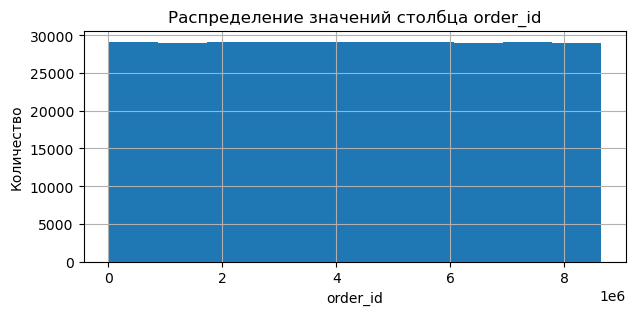

'----------------------------------------------------------------------------------------------------'

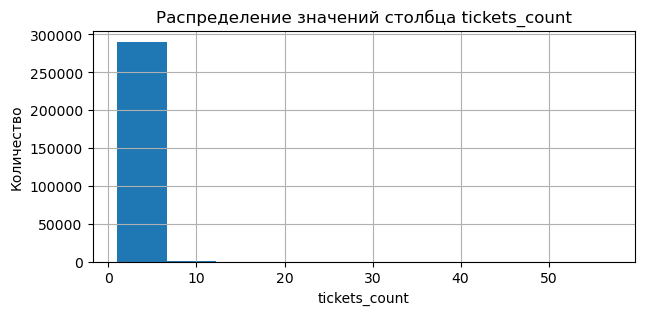

'----------------------------------------------------------------------------------------------------'

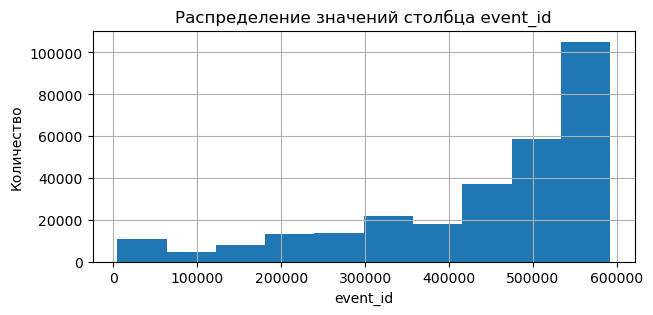

'----------------------------------------------------------------------------------------------------'

'Категориальных значений не обнаружено'

'----------------------------------------------------------------------------------------------------'

'Количество явных дубликатов:'

0

In [6]:
review_df(df, 100)

**Промежуточный вывод о данных:**
- Объем данных: 290 000 строк и 15 стобцов
- Типы данных автоматически определены верно. Для столбцов `tickets_count` и некоторых других понизим разрядность
- Пропущенные значения в единственном столюце `days_since_prev` - 22000 строк или 7.5% данных
- Явных дубликатов в данных нет

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Проверка корректности загруженных данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 

* Хорошо, что убеждаешь в корректности данных! Если при подгрузке возникли проблемы, а мы их не обнаружим, все последующие расчеты могут быть искажены.

    
* Круто, что не забываешь зафиксировать промежуточные наблюдения в выводах! Если потребуется вернуться к проекту спустя время, будет проще освежить в памяти все ключевые этапы работы, что и почему мы делали, что получили.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Было бы не лишним пояснить, почему в `days_since_prev` могут наблюдаться пропуски, проблема ли это, или это нормальная ситауция. В нашем случае, скорее всего, пропуски образовались только на первых заказах пользователей, в таком случае у них не существует предыдущего, от которого можно было бы посчитать количество дней.
 
    
* По результатам проверки корректности загруженных данных мы планируем дальнейшие шаги по обработке. Здесь можно было отметить, что нам также потребуется убедиться, что пропуски действительно имеются только у первых заказов, выполнить проверку на дубликаты (полные и неполные), проверить категориальные столбцы на предмет неявных дубликатов (разный регистр, разный формат записи, опечатки) и все числовые столбцы на наличие невалидных значений и аномалий, опционально сменить типы данных на более оптимальные, чтобы уменьшить тяжесть данных.
    
    
* Обрати внимание, что дубликаты могут быть в том числе неполные, например, если заказ пользователя задублировался в системе, был создан в нескольких экземплярах с разным `order_id` и, возможно, даже с небольшой разницей во времен. Чтобы не искажать статистические расчеты, от таких наблюдений тоже важно избавляться. Но для начала нужно проверить их начличие - для этого необходимо проверить, есть ли дубликаты на подвыборке без `order_id` и `days_since_prev`. Если обнаружим их и примем решение удалить, то потребуется также пересчитать признак с количеством дней между заказами.
    
</div>

<div class="alert alert-info">
<b>По поводу `days_since_prev` и дубликатов добавил в следующем шаге по предобработке</b> 
</div>

---

###  2. Предобработка данных

**Переведем денные о выручке в рубли:** 

Для этого используем датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`

Результаты преобразования сохраним в новый столбец `revenue_rub`.

---


In [7]:
currency_data = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [8]:
currency_data.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [9]:
currency_data['data'] = pd.to_datetime(currency_data['data'])

In [10]:
# Объединияем датафреймы
currency_data = currency_data.rename(columns={'data': 'order_dt'})
df = df.merge(currency_data[['order_dt', 'curs']], on='order_dt', how='left')

# создаем столбец revenue_rub
df['revenue_rub'] = df['revenue']
mask = df['currency_code'] == 'kzt'
df.loc[mask, 'revenue_rub'] *= df.loc[mask, 'curs'] / 100

# удаляем ненужный столбец после объединения
df = df.drop(columns=['curs'])

display(df[df['currency_code'] == 'kzt'].head(2))

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,service_name,event_type_main,region_name,city_name,revenue_rub
70,0033403583a55ed,mobile,7850214,2024-09-17,2024-09-17 16:52:06,kzt,518.10,4,20.0,559919,f5ec2467-ee48-42f3-89a0-a2d90d1d6fce,Билеты без проблем,другое,Верхоречная область,Серебрянка,98.503762
89,0040e12d70fae81,desktop,8634925,2024-09-02,2024-09-02 19:49:14,kzt,347.18,3,39.0,559476,61ec7c0e-ea0c-4a3e-a63a-09cbe1bc6177,Билеты без проблем,другое,Верхоречная область,Серебрянка,65.731589


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Перевод выручки в рубли <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> С шагом справились, результат корректный! Здорово, что убеждаешься в этом.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Как вариант, существует еще довольно удобный метод [where](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html). Мы можем применить его к столбцу и указать условие, которое будем проверять, а также альтернативный вариант значения. Если условие выполняется, то берется значение из столбца, если нет - альтернативное значение. Тогда расчет выручки в рублях будет выглядеть следующим образом:
    
```python
df['revenue_rub'] = df['revenue'].where(df['currency_code'] == 'rub', df['revenue'] * df['curs'] / 100)
```
    
* В исследовательской работе лучше вести последовательный сторителлинг и выполнять действия шаг за шагом. Сперва стоило убедиться в корректности данных по курсу и возможности выполнения шага - посмотреть на таблицу с курсом, выявить, что требуется смена типа для даты, проверить, что нет дубликатов, нет ли странных значений, продемонстрировать все это, а потом уже, отталкиваясь от выводов, двигаться к следующему шагу - присоединению курса к основной таблице и расчету выручки.

    
* Для проверки корректности выполнения шага лучше вывести на обозрение несколько строк только в интересующих нас столбцах. проверить стоит не только строки с тенге, но и исходно рублевой выручкой, действительно ли она осталась без изменений. Свои наблюдения не забываем фиксировать в выводах.
    
</div>


---



- **Пропущенные значения:** пропуски присутствуют только в столбце `days_since_prev`, они означают, что данный заказ - первый у конкретного пользователя. Поэтому как-либо заполнить эти пропуски мы не можем

---

In [11]:
# сохраним объем данных перед предобработкой
rows = df.shape[0]
rows

290611

In [12]:
df['tickets_count'] = pd.to_numeric(df['tickets_count'], downcast='integer')

df['days_since_prev'] = df['days_since_prev'].astype('Int64')
df['days_since_prev'] = pd.to_numeric(df['days_since_prev'], downcast='integer')

In [14]:
for col in ['device_type_canonical', 'currency_code', 'service_name', 'event_type_main']:
    df[col] = df[col].astype('category')

Оценим поле `days_since_prev`:

In [15]:
# убедимся, что пропуски присутствуют только у первых заказов пользователей
# для этого можем сравнить их количество с количеством пользователей, т.к. первый заказ у пользователя может быть только 1
print(f'Пропусков в days_since_prev: {df['days_since_prev'].isna().sum()}')
print(f'Количество пользователей: {df['user_id'].nunique()}')

Пропусков в days_since_prev: 21933
Количество пользователей: 21933


Пропуски обусловлены тем, что у первых заказов пользователей нет предыдущих. В дальнейшем анализе это можно будет использовать для составления признаков первого заказа.

- **Дубликаты**

In [89]:
# Полные дубликаты
df.duplicated().sum()

np.int64(0)

In [96]:
# Неполные бубликаты
df.loc[(df.index != 'order_id') & (df.index != 'days_since_prev')].duplicated().sum()

np.int64(0)

Явных и неполных дубликатов нет

In [13]:
# Проверим неявные дубликаты поля service_name
service_name = df['service_name'].sort_values()
service_name.unique()

array(['Crazy ticket!', 'Show_ticket', 'Билет по телефону',
       'Билеты без проблем', 'Билеты в интернете', 'Билеты в руки',
       'Быстробилет', 'Быстрый кассир', 'Весь в билетах', 'Восьмёрка',
       'Вперёд!', 'Выступления.ру', 'Городской дом культуры',
       'Дом культуры', 'Дырокол', 'За билетом!', 'Зе Бест!', 'КарандашРУ',
       'Кино билет', 'Край билетов', 'Лимоны', 'Лови билет!',
       'Лучшие билеты', 'Мир касс', 'Мой билет', 'Облачко', 'Прачечная',
       'Радио ticket', 'Реестр', 'Росбилет', 'Тебе билет!', 'Телебилет',
       'Тех билет', 'Цвет и билет', 'Шоу начинается!', 'Яблоко'],
      dtype=object)

Неявных дубликатов нет

**Проверим распределения численных данных:**

In [16]:
# для удобства будем использовать функцию с двумя типами графиков
def box_hist_plot(df, column, bins='auto', title=None):
    sns.set_theme(style="darkgrid")
    
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # assigning a graph to each ax
    sns.boxplot(df[column], orient="h", ax=ax_box)
    sns.histplot(data=df, x=column, ax=ax_hist, bins=bins)

    if title:
        ax_box.set(title=title)
    ax_box.set(xlabel='')
    plt.show()

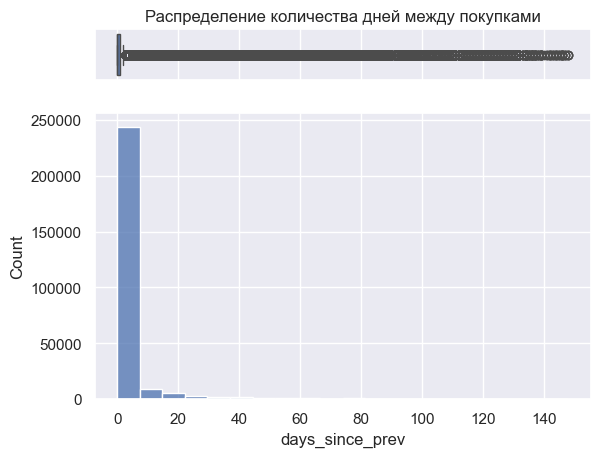

In [17]:
box_hist_plot(df, 'days_since_prev', bins=20,
              title='Распределение количества дней между покупками')

Распределение не нормальное, но аномалий нет

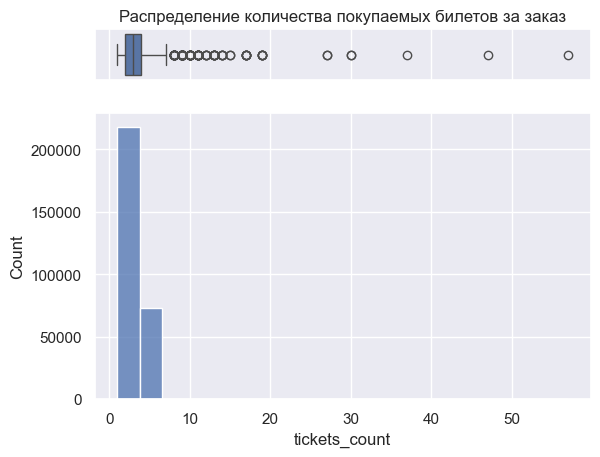

In [18]:
box_hist_plot(df, 'tickets_count', bins=20, 
              title='Распределение количества покупаемых билетов за заказ')

Присутствуют выбросы. Чтобы сфокусироваться на типичных сфенариях покупок, подобные значения будем отсекать по 95-99 процентилям:

In [19]:
df = df[df['tickets_count'] <= df['tickets_count'].quantile(0.95)]

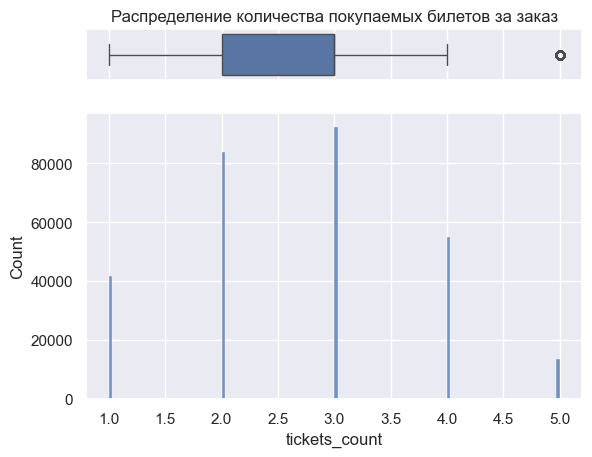

In [20]:
box_hist_plot(df, 'tickets_count',
              title='Распределение количества покупаемых билетов за заказ')

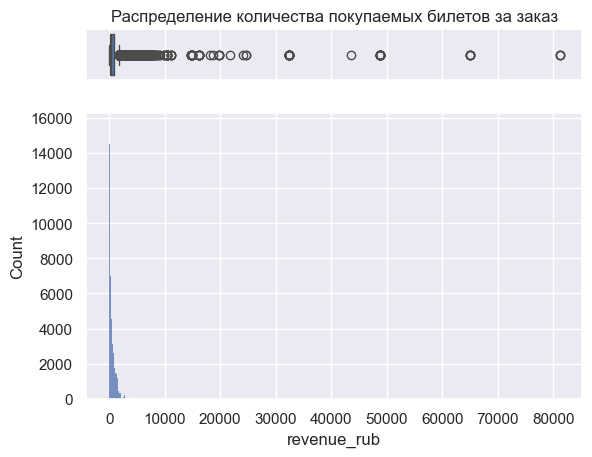

In [21]:
box_hist_plot(df, 'revenue_rub',
              title='Распределение количества покупаемых билетов за заказ')

Присутствуют выбросы, отсечем их до 99 процентиля.

In [22]:
df = df[df['revenue'] <= df['revenue'].quantile(0.99)]

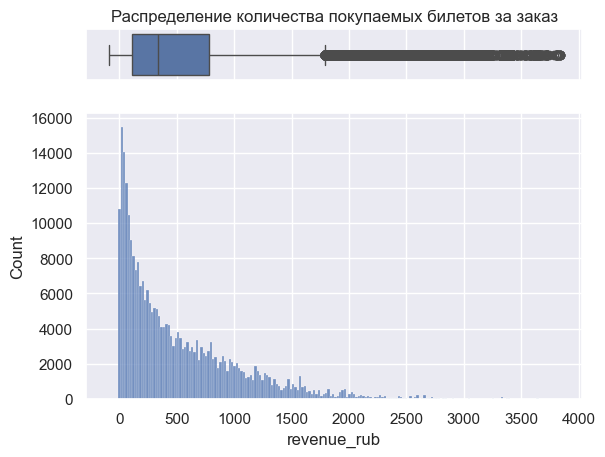

In [23]:
box_hist_plot(df, 'revenue_rub',
              title='Распределение количества покупаемых билетов за заказ')

В данных присутствуют небольшие отричательные значения. Возможно, они отражают какие-либо примененные промокоды или компенсации. В анализе подобные виды заказов нас не интересуют, поэтому отсечем их.

In [24]:
df = df[df['revenue'] >= 0]

Рассмотрим `event_type_main`:

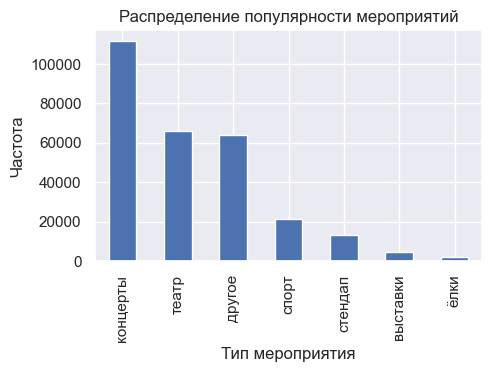

In [25]:
plt.figure(figsize=(5, 3))
df.groupby('event_type_main')['order_id'].count().sort_values(ascending=False).plot(kind='bar',
                        grid=True)

plt.title('Распределение популярности мероприятий')
plt.xlabel('Тип мероприятия')
plt.ylabel('Частота')

plt.show()

In [26]:
rows_deleted = rows - df.shape[0]
rows_deleted

7711

**Промежуточный вывод после предобработки:**
- Создан новый столбец `revenue_rub` с выручкой, выраженной в рублях для всех данных
- Пропуски обнаружены только в столбце `days_since_prev`
- Оптимизация типов: уменьшена разрядность для `tickets_count`, категоризированы `device_type_canonical`, `currency_code`, `service_name`, `event_type_main`
- Выбросы: Удалены значения выше 95 процентиля для `tickets_count`, значения выше 99 процентиля и ниже 0 для `revenue_rub` (в сумме 7711 строки или >2% данных)

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Предобработка данных <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> C задачей в целом справились, предобработку провели!
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b> 
    
* Категориальные столбцы не проверены на предмет неявных дубликатов. Возможно, для них требовалось проведение нормализации.
    
   
* Выбор границы для фильтрации количества билетов сейчас выглядит необоснованным. Если не существует какого-то известного фиксированного ограничения, то вручную прикидывать значения не очень грамотный ход, все же лучше рассчитывать границу динамически (например, через перцентили) на основе распределения.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Было бы не лишним убедиться, что пропуски имеются только у первых заказов пользователей, то есть что проблемы здесь нет. 
    
    
* Понизить размерность можно и у других числовых типов данных. Количество дней между заказами сперва только необходимо перевести в тип `Int`, а уже потом даункастить. `Int` допускает наличие пропусков, `int` нет. 
    
    
* В отношении категориальных признаков все же стоило сперва проверить наличие неявных дубликатов, а уже после переходить к обработке типов. Если признак представлен строками со свободной записью, в переходе на `category` будет мало толку.
 
    
* Для удобства анализа боксплот для определенного признака можно строить над или под гистограммой, чтобы можно было сопоставлять информацию из них ([пример](https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/)). Можно даже создать пользовательскую функцию, которая будет принимать на вход признак и выводить для него сразу два типа визуализации в одном графике.
    
    
* При принятии решения относительно выборосов - оставляем или выбрасываем - стоит сперва пояснять, во-первых, откуда они могли взяться (это в целом очевидно и в случае отрицательных значений - это могли быть какие-то возвраты или использование промокодов), во-вторых, ввиду причины их возникновения, полезно ли будет их учитывание для целей нашего анализа. Сейчас не ясно, почему было принято решение отбросить очень высокую и отрицательную выручку, а также высокое количество билетов. Просто потому что показалось необходимым - не аргумент.
    
    
* Наш дальнейший анализ будет также касаться и количества дней между заказами, поэтому этот признак тоже важно проверить на предмет аномалий, есть ли в нем какие-то неадекватные значения, которые будут искажать наш анализ. 
    
    
* Если выводим какие-то значения на печать, то в том числе стоит печатать и что это за значение, чтобы не приходилось разбираться в коде, чтобы это понять. Для красоты и удобства дробные значения при этом лучше округлять до знаков, которые могут представлять для нас интерес. Изменения (в количестве наблюдений в нашем случае) стоит также выражать в процентах, чтобы четко было выидно, насколько они существенны, при этом также печатать, сколько было до и сколько стало после.
    
    
* Для аккуратности работы стоит также разобраться с выскакивающими предупреждениями. Сейчас это предостережения касается отключение одного из параметров в будущем, поэтому их сейчас можем просто заглушить, установив в начале проекта настройку:
    
    ```python
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
```
    
</div>


<div class="alert alert-info">
<b>Исправлено. Также постарался учесть рекомендации</b> 
</div>

---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [56]:
grpd_df = df.sort_values(by='order_ts').groupby('user_id')
agg_df = grpd_df.agg(first_dt=('order_dt', 'min'), 
             last_dt=('order_dt', 'max'), 
             first_device=('device_type_canonical', 'first'), 
             first_region=('region_name', 'first'), 
             first_service=('service_name', 'first'), 
             first_genre=('event_type_main', 'first'), 
             total_orders=('order_id', 'count'), 
             avg_revenue=('revenue_rub', 'mean'), 
             avg_tickets=('tickets_count', 'mean'),
             avg_days_since_prev=('days_since_prev','mean')
            ).assign(
            is_two = lambda x: x['total_orders'] >= 2,
            is_five = lambda x: x['total_orders'] >= 5
            ).reset_index()

agg_df.head()

,user_id,first_dt,last_dt,first_device,first_region,first_service,first_genre,total_orders,avg_revenue,avg_tickets,avg_days_since_prev,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,Каменевский регион,Край билетов,театр,1,1521.940000,4.000000,<NA>,False,False
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,Каменевский регион,Мой билет,выставки,2,774.010000,3.000000,75.0,True,False
2,000898990054619,2024-07-13,2024-10-23,mobile,Североярская область,Лови билет!,другое,3,767.213333,2.666667,51.0,True,False
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,Каменевский регион,Край билетов,театр,1,917.830000,4.000000,<NA>,False,False
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,2,61.310000,1.500000,16.0,True,False


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Создание профиля пользователя <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
    
<b>Отлично ✅:</b> Хорошо, что ввиду использования агрегата `first` не забываешь про сортировку заказов по времени!
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Среднее количество дней между заказами можно было бы посчитать просто через усреднение уже имеющегося у нас признака. Если и считать твоим способом, то в знаменателе слодовало брать значение на единицу меньше, потому что интревалов между заказами у нас меньше, чем самих заказов.   
</div>
<div style="border-radius: 10px" class="alert alert-warning">

<b>Рекомендации💡:</b> Есть довольно удобный метод [assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html), позволяющий дополнять таблицу новыми рассчитанными столбцами.

Тогда создание всего профиля можно будет записать красивым и удобным по структуре кодом.

<details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>

```python
profiles = (df
        # В начале сортируем данные по дате совершения заказа, что найти первые признаки:
        .sort_values(by='order_ts')
        # Затем группируем по номеру пользователя и агрегируем данные:
        .groupby('user_id')
        .agg(
            # Находим первую и последнюю даты заказа:
            first_order_dt=('order_dt','min'),
            last_order_dt=('order_dt','max'),
            # Находим устройства, регион, название билетного партнера и жанр мероприятия первого заказа:
            first_device=('device_type_canonical','first'),
            first_region_name=('region_name','first'),
            first_service_name=('service_name','first'),
            first_event_type=('event_type_main','first'),
            # Подсчитваем количество заказов:
            total_orders=('order_id','nunique'),
            # Считаем статистику по заказам: средняя стоимость заказа, среднее количество билетов:
            avg_revenue_rub=('revenue_rub','mean'),
            avg_tickets_count=('tickets_count','mean'),
            # Считаем среднее количество дней между покупками:
            avg_days_since_prev=('days_since_prev','mean')
        )
        # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов:
        .assign(
            is_two = lambda x: x['total_orders'] >= 2,
            is_five = lambda x: x['total_orders'] >= 5
        )
        .reset_index()
)
```
</details>


</div>

<div class="alert alert-info">
<b>Исправлено</b> 
</div>

---

**Репрезентативность данных и аномалии** 

Используя данные о профилях пользователей, рассчитаем:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучим статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

In [28]:
total_users = agg_df.shape[0]
print('total users: ', total_users)

avg_revenue = (agg_df['total_orders'] * agg_df['avg_revenue']).sum() / agg_df['total_orders'].sum()
print('avg revenue total: ', avg_revenue)

is_two_share = agg_df['is_two'].mean()
print('is_two share: ', is_two_share)

is_five_share = agg_df['is_five'].mean()
print('is_five share: ', is_five_share)

total users:  21601
avg revenue total:  520.6131134439629
is_two share:  0.6163140595342809
is_five share:  0.2895699273181797


In [29]:
agg_df[['total_orders', 'avg_tickets', 'avg_time_btw_orders']].describe()

,total_orders,avg_tickets,avg_time_btw_orders
count,21601.000000,21601.000000,21601
mean,13.096616,2.699470,6 days 12:25:21.079902078
std,120.350371,0.857613,10 days 22:46:41.269541537
min,1.000000,1.000000,0 days 00:00:00
25%,1.000000,2.000000,0 days 00:00:00
50%,2.000000,2.700000,0 days 00:00:00
75%,5.000000,3.000000,9 days 10:17:08.571428571
max,9979.000000,5.000000,74 days 00:00:00


**Надлюдения:**
- Имеем 21601 пользователей
- Один из пользователей совершил 10000 заказов - аномалия. 
- Распределение среднего количества покупаемых билетов нормальное



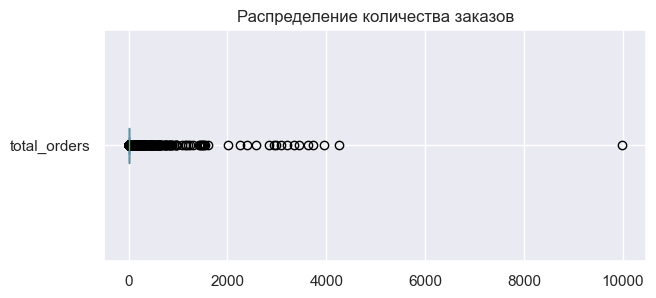

In [30]:
plt.figure(figsize=(7, 3))
agg_df['total_orders'].plot(kind='box', 
           vert=False)
plt.title('Распределение количества заказов')
plt.show()

Имеем большое количество выбросов-аномалий. Мы оцениваем наиболее типичное поведение пользователей, поэтому исключим их из анализа

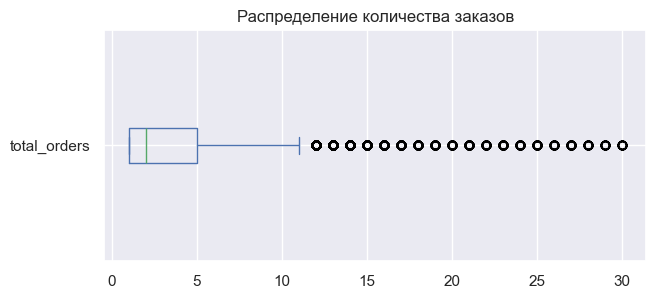

In [31]:
agg_df = agg_df[agg_df['total_orders'] < agg_df['total_orders'].quantile(0.95)]

plt.figure(figsize=(7, 3))
agg_df['total_orders'].plot(kind='box', 
           vert=False)
plt.title('Распределение количества заказов')
plt.show()

Аномалии удалены, выведем статистические показатели снова:

In [32]:
total_users = agg_df.shape[0]
print('total users: ', total_users)

avg_revenue = (agg_df['total_orders'] * agg_df['avg_revenue']).sum() / agg_df['total_orders'].sum()
print('avg revenue total: ', avg_revenue)

is_two_share = agg_df['is_two'].mean()
print('is_two share: ', is_two_share)

is_five_share = agg_df['is_five'].mean()
print('is_five share: ', is_five_share)

total users:  20494
avg revenue total:  543.2528101975009
is_two share:  0.595588952864253
is_five share:  0.2511954718454182


In [33]:
agg_df[['total_orders', 'avg_tickets', 'avg_time_btw_orders']].describe()

,total_orders,avg_tickets,avg_time_btw_orders
count,20494.000000,20494.000000,20494
mean,3.993705,2.699992,6 days 18:02:20.600155688
std,4.989171,0.878472,11 days 04:32:40.080868357
min,1.000000,1.000000,0 days 00:00:00
25%,1.000000,2.000000,0 days 00:00:00
50%,2.000000,2.714286,0 days 00:00:00
75%,5.000000,3.000000,10 days 00:00:00
max,30.000000,5.000000,74 days 00:00:00


- Удалено около 1000 пользователей
- Распределение количества купленных бидетов смещено влево (среднее - 2 / медиана - 4)
- Данные для анализа можем считать готовыми

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ пользовательских профилей <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здесь все супер, выполнены все необходимые шаги!
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Опять же, как принималось решение о зачистке выбросов? Почему удалили эти значения и решили не удалять другие? Что насчет количества дней между заказами, про него совсем ничего не сказано.
    
    
* В выводах было бы не лишним прокомментировать, насколько сильно изменились показатели в результате фильтрации, и четко зафиксировать, готовы ли наши данные для анализа, достаточно ли их.
    
    
* Напоминаю про моменты, которые уже поясняла в предыдущик комментариях: округление выводимых на печать значений.

</div>


<div class="alert alert-info">
<b>Подправил пояснения. По поводу округлений: обязательно учту это в будущих проектах :)</b> 
</div>

---

### 4. Исследовательский анализ данных

Исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [60]:
# Для удобства напишем функцию для  
def distribution_stats(df, column):
    by_column = df.groupby(column)
    by_column_distr = by_column.agg(count=('first_dt', 'count')).sort_values(by='count', ascending=False)
    by_column_distr['share'] = by_column_distr / total_users
    return by_column_distr

In [61]:
distribution_stats(agg_df, 'first_genre')

,count,share
first_genre,,
концерты,9423,0.459793
другое,5441,0.265492
театр,4312,0.210403
стендап,1110,0.054162
спорт,803,0.039182
выставки,417,0.020347
ёлки,95,0.004636


Чаще всего пользователи покупают билеты на концерты

In [62]:
distribution_stats(agg_df, 'first_device')

,count,share
first_device,,
mobile,17921,0.874451
desktop,3680,0.179565


83% пользователей совершают первые покупки с мобильных устройств

In [63]:
distribution_stats(agg_df, 'first_region')

,count,share
first_region,,
Каменевский регион,7198,0.351225
Североярская область,3770,0.183956
Широковская область,1243,0.060652
Озернинский край,677,0.033034
Малиновоярский округ,544,0.026544
...,...,...
Залесский край,2,0.000098
Тихогорская область,2,0.000098
Верхозёрский край,1,0.000049


33% пользователей совершили первую покупку из Каменевского региона, далее Североярская область (17%), Широковская (6%)

In [64]:
distribution_stats(agg_df, 'first_service')

,count,share
first_service,,
Билеты без проблем,5148,0.251195
Лови билет!,2862,0.139651
Мой билет,2772,0.135259
Билеты в руки,2583,0.126037
Облачко,2212,0.107934
Весь в билетах,1308,0.063824
Лучшие билеты,1185,0.057822
Прачечная,599,0.029228
Край билетов,463,0.022592


Лидируют "Билеты без проблем" - 24% первых покупок, "Лови билет" - 13% и "Мой билет" - 13%. 

Присутствуют операторы, не имеющие "новых" покупателей вовсе

В целом распределение по категориям неравномерно, по всем признакам есть выраженные "точки входа"

---

**Для каждого сегмента вычислим долю пользователей, совершивших два и более заказа** 

In [109]:
# Функция для быстрого построения стобчатой диаграмы с долями пользователей, совершивших 2+ заказа по признакам
def to_is_two_bar(df, column, title, figsize=(7, 3), head=None):
    grouped = df.groupby(column)
    grouped = grouped['is_two'].mean().sort_values(ascending=False)
    total_groups = len(grouped)
    if head:
        grouped = grouped.head(head)
        percent = head / total_groups * 100
        print(f"Выводим {head} из {total_groups} групп ({percent:.1f}%)")
        
    ax = grouped.plot(kind='bar',
                     grid=True, 
                     figsize=figsize)
    
    avg_is_two = df['is_two'].mean()
    
    plt.axhline(y=avg_is_two, color='red', linestyle='--', label='Общая возвращаемость по выборке', alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.show()

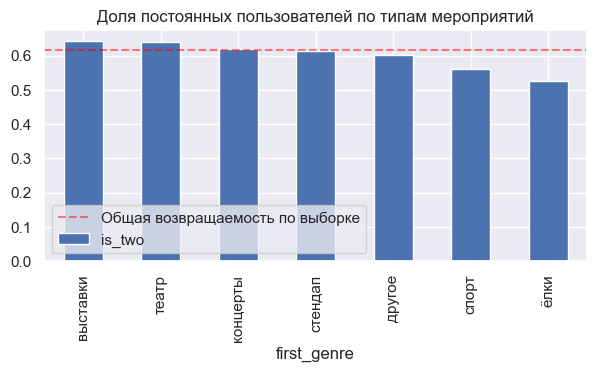

In [110]:
to_is_two_bar(agg_df, 'first_genre', 'Доля постоянных пользователей по типам мероприятий')

Доля постоянных пользователей не сильно зависит от категории первого мероприятия - варьируется от 0.54 до 0.62. 

Больше всего на выставках, меньше всего на ёлках

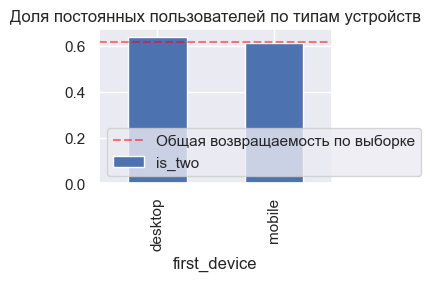

In [111]:
to_is_two_bar(agg_df, 'first_device', 'Доля постоянных пользователей по типам устройств', figsize=(3, 2))

Разница также минимальна

Выводим 10 из 81 групп (12.3%)


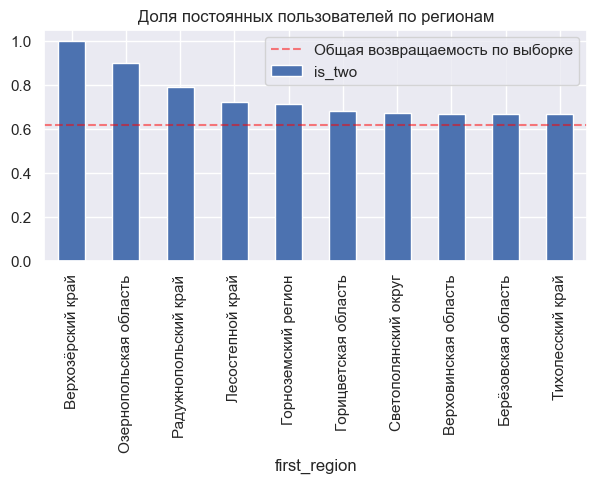

In [112]:
to_is_two_bar(agg_df, 'first_region', 'Доля постоянных пользователей по регионам', head=10)

Единственный пользователь Верхозерского края оказался постоянным. В целом можно сказать, что регион не влияет на возврат пользователя

Выводим 10 из 36 групп (27.8%)


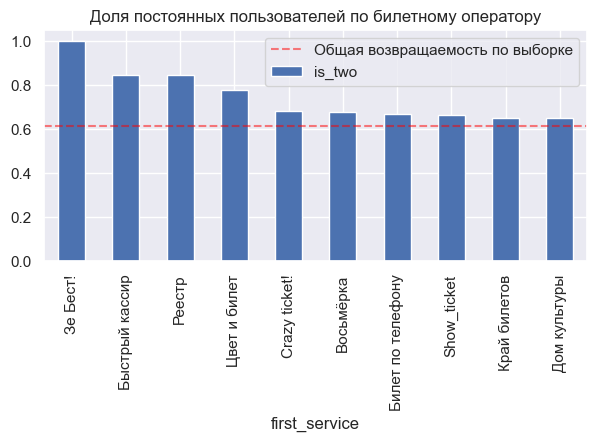

In [113]:
to_is_two_bar(agg_df, 'first_service', 'Доля постоянных пользователей по билетному оператору', head=10)

Лидирующие 4 оператора имеют мало пользователей в целом, что влияет на результат. 

Среди популярных операторов - выделяющихся нет

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверим продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

**Гипотеза 1**

Нет, это не так. Пользователи, выбравшие концерты, возвращаются немного чаще, чем выбравшие спорт, однако лидируют выбравшие выставки и театры

**Гипотеза 2**

Нет, это не так. Регионы с наибольшей долей повторных заказов имеют совсем небольшое количество пользователей, это связано с тем, что малое количество пользователей в регионе делает результат нестабильным.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ сегментов пользователей <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> По результатам все верно!

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Сейчас ты выполняешь большое количество однотипных действий. Чтобы немного облегчить код и уменьшить влияние человеческого фактора, стоит создать какую-нибудь пользовательскую функцию или зациклить выполнение определенного шаблона действий.
    
    
* В случае вывода неполного набора сегментов стоит указать, какой процент от выборки они составляют, чтобы было понимание, насколько большая часть данных осталась за пределами нашего обзора.
    

* Также было бы неплохо добавить на графики линию общей возвращаемости по выборке, чтобы было удобно сравнивать, какие сегменты и насколько отличаются от общего показателя по выборке. Это можно сделать с помощью `plt.axhline`, потребуется также добавить легенду, чтобы обозначить, что есть что. Но обращаю внимание, что ввиду различия размерности групп это должна быть это возвращаемость в выборке, а не среднее между возвращаемостями по группам.
 

* В выводах по анализу сегментов было бы неплохо также попробовать предположить, почему мы могли получить то или иное распределение по сегментам и определенный уровень возвращаемости, почему показатели оказались именно такими. Это может быть полезно в плане развития стратегий по привлечению новых пользователей. 
    
    
* Выводы по гипотезам подкрепляем конкретными значениями, чтобы было понятно, чем именно ты руководствовался, когда выносил вердикт.
    
    
* По представленным тобой расчетом сделать однозначный выбор по гипотезе о регионах сейчас не представляется возможным. Важно иметь в виду, что в менее популярных группах 1 дополнительный пользователь имеет больший вес, а потому показатель возвращаемости у таких категорий больше подвержен колебаниям, менее стабилен. Чтобы сделать более осознаный вывод, можно, к примеру, построить скаттерплот с отображением размера региона и возвращаемости в нем, тогда будет видно всю картину в данных и можно будет сказать, что судя по относительно крупным регионам, в стабильности которых мы более менее уверены, такой зависимости не наблюдается.
    
    Но вообще, чтобы наверняка убедиться в том, что возвращаемость в неполпуляных группах ниже, и это не случайное колебание, следует провести статистический тест, оценить значимость различий. Это будет изучаться в дальнейшем на курсе.
    
</div>

<div class="alert alert-info">
<b></b> 
</div>

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучим количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Проследим связь между средней выручкой сервиса с заказа и повторными заказами** 



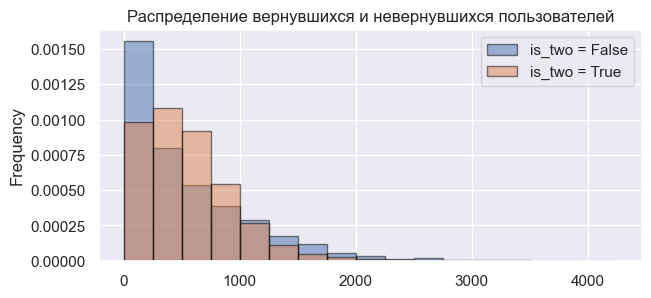

In [42]:
for i in range(2):
    agg_df.loc[agg_df['is_two'] == i, 'avg_revenue'].plot(kind='hist', 
                                                          bins=range(0, 4500, 250),
                                                          alpha=0.5, 
                                                          legend=True, 
                                                          label=f'is_two = {bool(i)}', 
                                                          edgecolor='black', 
                                                          density=True, 
                                                          grid=True, 
                                                          figsize=(7, 3)
                                                         )

plt.title('Распределение вернувшихся и невернувшихся пользователей')
plt.show()

Средняя выручка с билета у пользователей, совершивших одну покупку, чаще всего наблюдаются значения до 250 рублей. 

Постоянные пользователи чаще выбирают билеты до 1000 рублей, но реже более 1000 рублей, чем первые. 

---

**Сравним распределение по средней выручке с заказа в двух группах пользователей**

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

---


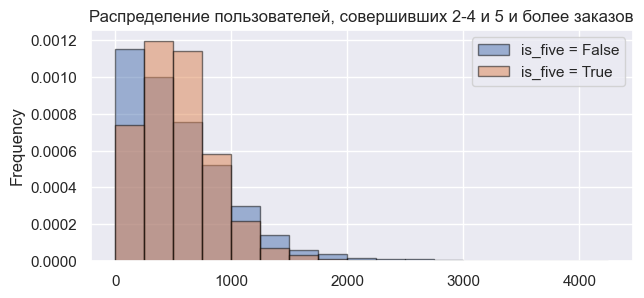

In [43]:
for i in range(2):
    agg_df.loc[(agg_df['is_two']) & (agg_df['is_five'] == i), 'avg_revenue'].plot(kind='hist', 
                                                                                  bins=range(0, 4500, 250),
                                                                                  alpha=0.5, 
                                                                                  legend=True, 
                                                                                  label=f'is_five = {bool(i)}', 
                                                                                  edgecolor='black', 
                                                                                  density=True, 
                                                                                  grid=True, 
                                                                                  figsize=(7, 3)
                                                                                 )

plt.title('Распределение пользователей, совершивших 2-4 и 5 и более заказов')
plt.show()

Совершившие 2-4 покупки чаще тратят менее 250 и более 1000 рублей

Совершившие 5 и более покупок чаще покупают билеты от 250 до 1000 рублей

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ взаимосвязи средней выручки и числа заказов <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 
    
* С этой задачей тоже справились! 
    
    
* Плюсик за грамотное оформление графиков - заголовок, подписи осей, легенда, поправка на размер выборки (`density`), единый размер бинов.
 
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Опять же, было бы не лишним предположить, почему мы получаем именно такой результат, как это характеризует наших клиентов.
    
</div>

---

**Проанализируем влияние среднего количества билетов в заказе на вероятность повторной покупки**

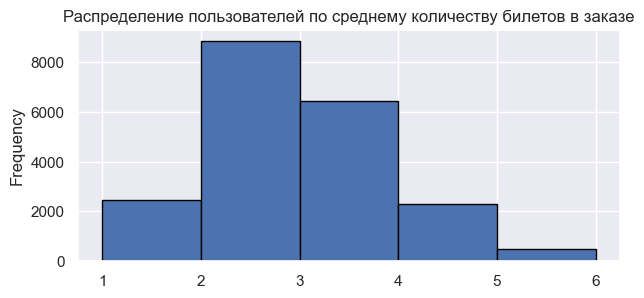

In [44]:
agg_df['avg_tickets'].plot(kind='hist', 
                           bins=range(1, 7),
                           edgecolor='black', 
                           grid=True, 
                           figsize=(7, 3)
                          )

plt.title('Распределение пользователей по среднему количеству билетов в заказе')
plt.show()

Больше всего пользователей, покупающих по 2-3 билета, далее - 1 и 4, реже - 5+

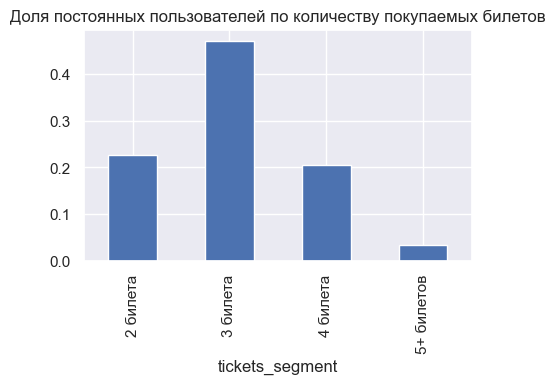

In [86]:
bins = [1, 2, 3, 4, agg_df['total_orders'].max() + 1]
labels = ['2 билета', '3 билета', '4 билета', '5+ билетов']
agg_df['tickets_segment'] = pd.cut(agg_df['avg_tickets'], bins=bins, labels=labels, right=True, include_lowest=False)

plot_data = agg_df.groupby('tickets_segment')['avg_tickets'].count() / agg_df.shape[0]
plot_data.plot(kind='bar', figsize=(5, 3))

plt.title('Доля постоянных пользователей по количеству покупаемых билетов')
plt.show()

Больше всего постоянных пользователей среди таех, что покупают по 3 билета за заказ.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ взаимосвязи количества билетов в заказе и возвращаемости <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Сейчас ты просто проанализировал, как много билов клиенты покупают за одни заказ, но никак не связал это с возвращаемостью клиентов. Чтобы ответить на вопрос данной задачи, необходимо сегментировать клиентов по количеству билетов и внутри каждого сегмента посмотреть долю вернувшихся за повторным заказом.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Для сегментации данных есть довольно удобный метод [сut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Можно задать границы интервалов и последовательный список наименований сегментов и они автоматически сформируются. Необходимо только правильно настроить параметр `right`, который по умолчанию имеет значение `True`, и параметр `include_lowest`, по умолчанию имеющий значение `False`, чтобы у нас включались и исключались нужные нам границы интервала.
    

* В выводах было бы неплохо предположить, что это за группы у нас сформировались (что за типы клиентов), и почему получились именно такие результаты по возвращаемости. Опять же, это может быть полезно в плане развития стратегий по привлечению новых пользователей.

</div>

<div class="alert alert-info">
<b>Исправлено</b> 
</div>

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучим временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Проанализируем, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей**


In [45]:
agg_df['first_day_of_week'] = agg_df['first_dt'].dt.weekday

by_day_of_week = agg_df.groupby('first_day_of_week').agg(count=('first_dt', 'count'), 
                                                         is_two_share=('is_two', 'mean'))

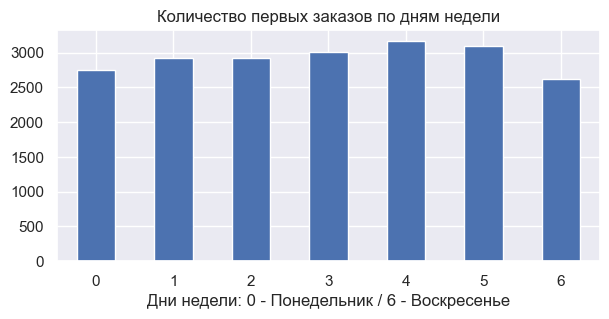

In [46]:
by_day_of_week['count'].plot(kind='bar', 
                             grid=True, 
                             figsize=(7, 3), 
                             rot=0
                            )

plt.title('Количество первых заказов по дням недели')
plt.xlabel('Дни недели: 0 - Понедельник / 6 - Воскресенье')
plt.show()

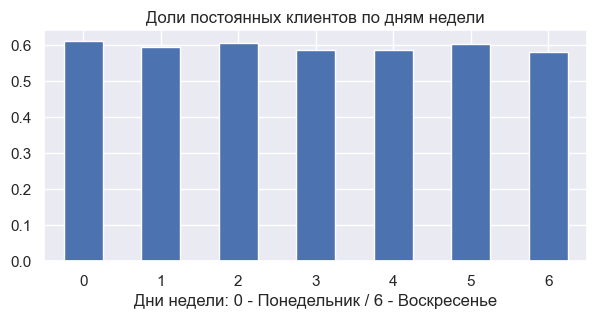

In [47]:
by_day_of_week['is_two_share'].plot(kind='bar', 
                             grid=True, 
                             figsize=(7, 3), 
                             rot=0
                            )

plt.title('Доли постоянных клиентов по дням недели')
plt.xlabel('Дни недели: 0 - Понедельник / 6 - Воскресенье')
plt.show()

Количество первых заказов растет от понедельника до пятницы/субботы, затем резко снижается в воскресенье.

При этом доля постоянных клиентов не зависит от дня недели

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ возвращаемости по дням недели  <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здесь в целом все супер! Различия по дням недели  все же наблюдаеются, хотя и не очень заметные. Чтобы судить более однозначно, было бы неплохо сопроводить сравнение оценкой стат. значимости. Это будет изучаться далее на курсе.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Для удобства анализа лучше выводить не порядковые номера, а наименования дней, их можно получить через `.dt.day_name()`.

    
* На график было бы неплохо добавить линию общей возвращаемости по выборке, чтобы было удобнее сравнивать, какой день недели насколько отклоняется.
    
    
* В выводах было бы неплохо также предположить, почему в топ и антитоп (которые все-таки создается, хотя и на так явно) выбиваются определенные дни недели? Какие суждения о пользователях относительно этого можно выстроить?


</div>

---

**Изучите, как средний интервал между заказами влияет на удержание клиентов.**

In [48]:
for_2_4 = agg_df.loc[agg_df['is_two'] & (agg_df['is_five'] == False), 'avg_time_btw_orders'].mean()
for_5 = agg_df.loc[agg_df['is_five'], 'avg_time_btw_orders'].mean()

print('Среднее время между заказами')
print(f'Для совершивших 2-4 заказа: {for_2_4}')
print(f'Для совершивших 5 и более заказов: {for_5}')

Среднее время между заказами
Для совершивших 2-4 заказа: 12 days 12:34:56.344573533
Для совершивших 5 и более заказов: 9 days 16:58:04.199609689


Более постоянные клиенты имеют более короткий интервал между покупками билетов. 

Учитывая это, если с момента последнего заказа клиента прошло более 9-12 дней, следует подключать стратегии вовлечения в новый заказ.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ возвращаемости по количеству дней между заказами <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> По расчетам все верно!
    
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Важно иметь в виду, что среднее значение довольно сильно зависит от характера распределения, если есть какие-то сильные выбросы, они могут утянуть среднее значение вверх, хотя основаня масса значений будет гораздо ниже. Поэтому здесь важно было бы построить в том числе гистограммы, наложить их друг на друга (как мы это делали при сравнении выручки), чтобы видеть всю картину в данных.
    
    
* Вывод банальный и очевидный даже без расчетов. Здесь скорее нужно сделать обратный ход - подумать, как по интервалу времени после первого заказа можно определять, есть ли шанс, что клиент еще вернется самостоятельно, или пора пора подключать стратегии для вовлеченя в новый заказ.

</div>

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучим, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используем универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Проведите корреляционный анализ:**
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [49]:
agg_df.columns

Index(['first_dt', 'last_dt', 'first_device', 'first_region', 'first_service',
       'first_genre', 'total_orders', 'avg_revenue', 'avg_tickets',
       'avg_time_btw_orders', 'is_two', 'is_five', 'first_day_of_week'],
      dtype='object')

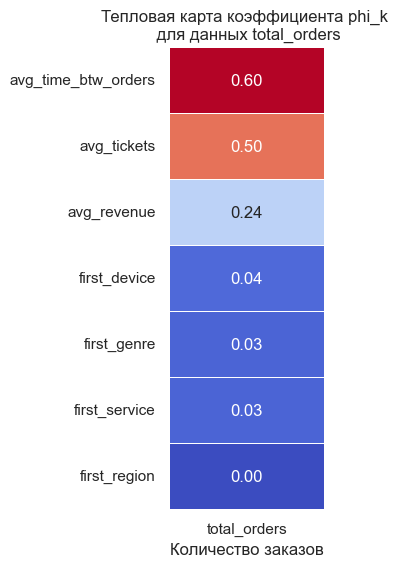

In [50]:
agg_df['avg_time_btw_orders'] = pd.to_numeric(agg_df['avg_time_btw_orders']) / (24 * 3600)

to_corr_columns = ['first_device', 'first_region', 'first_service', 'first_genre', 'total_orders', 
                   'avg_revenue', 'avg_tickets', 'avg_time_btw_orders']

corr = agg_df[to_corr_columns].phik_matrix(interval_cols=['total_orders', 'avg_revenue', 'avg_tickets', 'avg_time_btw_orders'])

corr = corr.loc[corr.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)
plt.figure(figsize=(2, 6))
sns.heatmap(corr,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar=False)

plt.title('Тепловая карта коэффициента phi_k \n для данных total_orders')
plt.xlabel('Количество заказов')
plt.show()

Видим довольно сильную связь количества заказов со средним временем между ними. 

Также наблюдается слабая связь со средним количеством билетов в заказе и средней стоимостью билетов.

Разделим пользователей на сегменты по количеству заказов и проведем корреляционный анализ еще раз:

In [51]:
def to_segment(orders):
    if orders == 1:
        return '1'
    if orders < 5:
        return '2-4'
    return '5+'

    
agg_df['segment'] = agg_df['total_orders'].apply(to_segment)

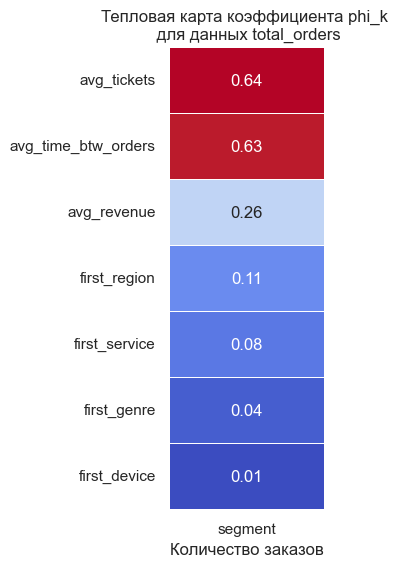

In [52]:
to_corr_columns = ['first_device', 'first_region', 'first_service', 'first_genre', 'segment', 
                   'avg_revenue', 'avg_tickets', 'avg_time_btw_orders']

corr = agg_df[to_corr_columns].phik_matrix(interval_cols=['avg_revenue', 'avg_tickets', 'avg_time_btw_orders'])

corr = corr.loc[corr.index != 'segment'][['segment']].sort_values(by='segment', ascending=False)
plt.figure(figsize=(2, 6))
sns.heatmap(corr,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar=False)

plt.title('Тепловая карта коэффициента phi_k \n для данных total_orders')
plt.xlabel('Количество заказов')
plt.show()

После сегментации клиентов, связь количества заказов со временем между ними стала немного сильнее (0.6 -> 0.63)

Также намного явнее стала связь с количеством билетов в заказе. 

Заметной связи с регионом, билетным оператором, типом устройства и типом мероприятия не наблюдается

Проверим некоторые связи:

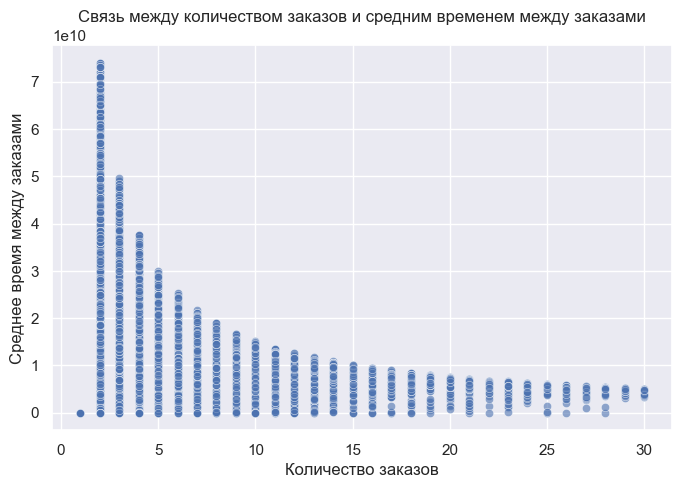

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=agg_df, x='total_orders', y='avg_time_btw_orders', alpha=0.6)

plt.title('Связь между количеством заказов и средним временем между заказами')
plt.xlabel('Количество заказов')
plt.ylabel('Среднее время между заказами')
plt.grid(True)
plt.show()

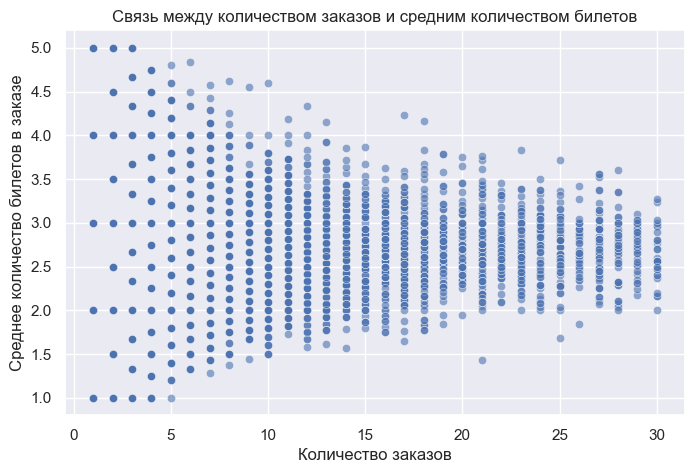

In [54]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=agg_df, x='total_orders', y='avg_tickets', alpha=0.6)

plt.title('Связь между количеством заказов и средним количеством билетов')
plt.xlabel('Количество заказов')
plt.ylabel('Среднее количество билетов в заказе')
plt.grid(True)
plt.show()

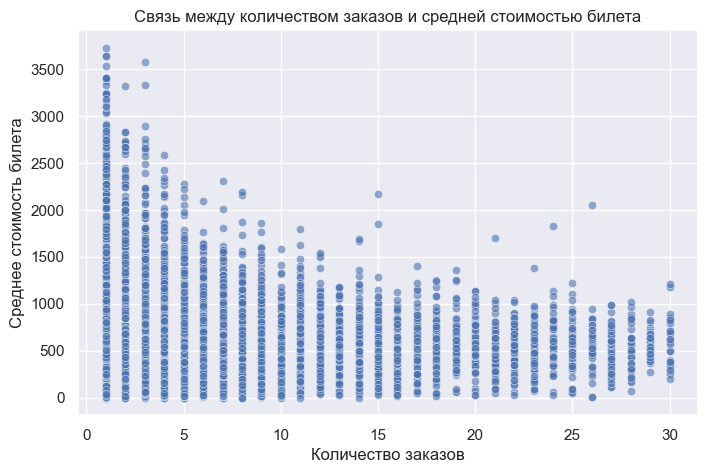

In [55]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=agg_df, x='total_orders', y='avg_revenue', alpha=0.6)

plt.title('Связь между количеством заказов и средней стоимостью билета')
plt.xlabel('Количество заказов')
plt.ylabel('Среднее стоимость билета')
plt.grid(True)
plt.show()

Наличие связей подтверждается на графиках

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ корреляции <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здорово, что пробуешь сбалансировать разбиение на интервалы для количества заказов.

</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Относительно интерпретации. Обрати внимание, что phik реализует оценку взаимосвязи, но это взаимосвязь не обазательно монотонная. Поэтому некорректно делать суждения о ее направленности, что с увеличеним одного показателя будет увеличиваться другой.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Было бы не лишним включить в анализ день недели.
    

* С какой целью строили графики? Если мы хотели что-то узнать, то это необходимо зафиксировать в вывовадх. Если фиксировать нечего, то и шаг был бессмысленен.
    
    
*  В выводах было бы неплохо провести параллель с нашими предыдущими шагами анализа. Прокомментировать, почему высокая корреляция получается с одиними признаками и низкая с другими. Что по итогу важно для манипулирования возвращаемостью клиентов, а что нет?

</div>

<div class="alert alert-info">
<b>Исправлено</b> 
</div>

### 5. Общий вывод и рекомендации

**Информация о данных**

В ходе исследования проанализированы данные 20000 пользователей, совершивших 290000 заказов по данным сервиса Яндекс Афиша. Данные включали общую информацию о заказах, а также о мероприятиях. Акцент был на составлении портрета пользователся, склонного к повторному совершению заказа. 

В ходе предобработки были устранены выбросы и аномалии, создан новый столбец с выручкой, выраженной в рублях - для этого был использован дополнительный датасет с исторической информацией о курсе тенге к рублю.

Также, на основе данного датасета была проведена агрегация для составления профилей пользователей с информацией о первых заказах и статистических данных.

**Основные результаты анализа.** 
- В выборке более 20000 пользователей, среди которых около 60% совершили более 1 заказа и около 25% совершили 5 и более заказов.
- Больше всего пользователей совершило 2-3 заказа, а покупают по 3 билета за заказ.
- Пользователи, выбравшие выставки, театры и концерты в качестве первого мероприятия, немного чаще совершают повторные покупки
- Чем больше заказов у пользователя, тем меньше среднее время между ними
- Постоянные пользователи чаще покупают 2-3 билета за заказ
- Постоянные клиенты чаще покупают более дешевые билеты

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

**Рекомендации**
- Стоит обратить внимание на пользователей, выбравших выставки, театры и концерты в качестве первого мероприятия. Возможно следует продвигать мероприятия данного типа, проводить рекламные кампании.
- Стимулировать клиентов совершать регулярные покупки. Особенно для тех, кто не был активен 9-12 дней.
- Внедрить систему скидок или другие виды поощрения заказов с 2-3 билетами. 
- Чем больше заказов - тем меньше время между ними. Можно использовать рассылку уведомлений или внедрить программы лояльности, поощряющие регулярные покупки


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Итоговые выводы <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> С задачей справились! 
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* `Чем больше заказов у пользователя, тем меньше среднее время между ними` - как уже говорила, это банальное суждение, нужно идти от обратного, поскольку сейчас мы заинтересованы в поиске способов по вовлечению пользователей в повторные заказы.
    
    
* `Чем больше заказов, тем меньше разброс значений среднего количества билетов за заказ. Чем больше заказов, тем чаще пользователи покупают 2-3 билета за заказ` - ни то, ни другое мы не проверяли. В отношении билетов необходимо посмотреть, какой тип пользователей более стабилен в своем поведении и чаще возвращается за повторными заказами.
    

* `Постоянные клиенты чаще покупают более дешевые билеты` - это суждение некорректно, у нас все было наооборот.

</div>

<div class="alert alert-info">
<b>Подправил вывод и рекомендации. Немного не понял по поводу третьего пункта ваших рекомендаций: после корреляционного анализа я построил график с количеством заказов и средней выручкой с них. Видно, что средняя выручка в среднем ниже при увеличении количества заказов</b> 
</div>

### 6. Финализация проекта и публикация в Git



https://github.com/RollyDorian/yandex_module_prj

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Публикация в Git <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> По ссылке есть все необходимые данные. Отличная работа! 

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Можно заполнить readme полезной информацией о проекте, зафиксировать цели, указать ключевые моменты и полученные выводы.

</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Не забудь обновить файл с проектом, после того, как засекретишь подключение к БД, а также включить файл с паролями в игнорируемый.
</div>

<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<h3>Общий вывод по проекту <a class="tocSkip"></h3>
    
Ролан, спасибо за твой проект! У тебя хорошая работа! В тебе виден будущий профессионал своего дела :) Однако есть еще моменты, которые требуют твоего внимания. Кратко пройдусь по впечатлениям. 
    
**Полнота:** все требуемые задачи были выполнены!
    
**Корректность:** 
   
* <span style="color:Red;">Необходимо засекретить подключение к БД, чтобы не скомпромитировать явки и пароли. Не забываем обновить файл в Git.</span>
* <span style="color:Red;">Необходимо расширить предобработку данных. Проверка на неявные дубликаты - важный этап предобработки по умолчанию.</span>
* <span style="color:Red;">Необходимо скорректировать фильтрацию по количеству билетов, брать значения не из головы, а получать их динамически.</span>
* <span style="color:Red;">Необходимо скорректировать расчет среднего интервала между заказами при создании профилей пользователей.</span>
* <span style="color:Red;">Необходимо скорректировать анализ по количеству билетов, связать сегменты пользователей с возвращаемостью.</span>
* <span style="color:Red;">Необходимо скорректировать интерпретацию результатов корреляции.</span>

**Аналитическая проницательность:** ты в целом верно подмечаешь все ключевые нюансы данных, даешь дельные рекомендации! Местами можно чуть углубить суждения, фиксировать не только то, что наблюдаем, но и предполагать, почему получилось именно так. Чуть внимательнее отнестить к итоговым выводам и рекомендациям.
    
**Эффективность кода:** по этому критерию в целом тоже все супер! В некоторых местах можно использовать чуть более удобные и компактные методы, зацикливать повторяющиеся действия.
    
**Оформление:** им тоже важно не пренебрегать! Оформление тесно связано с удобством восприятия предоставляемой информации и созданием впечатления о работе. Твоя работа в целом довольно аккуратная - выделены разделы, грамотно оформлены графики, код сопровождается краткими комментариями, но еще есть некоторый потенциал для улучшений (смотри по ходу работы).
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
<img src="https://99px.ru/sstorage/86/2015/12/image_86271215043043632690.gif" />

<div class="alert alert-info">
<b>Спасибо за такое качественное ревью, рад видеть столь объемные комментарии к работе :)</b> 
<br>
<b>К сожалению модуль курса подходит к концу и наступает жесткий дедлайн, поэтому приходится сильно торопиться. Исправил ошибки, постарался учесть рекомендации сколько успел. Очень прошу, если найдутся новые ошибки отметить их как рекомендации к исправлению и принять проект, все обязательно исправлю уже для личного портфолио </b> 
</div>